# Boot

In [1]:
!pip install -U git+https://github.com/AndressaStefany/evolving_systems

  Cloning https://github.com/AndressaStefany/evolving_systems to /tmp/pip-req-build-ts7z3tyd
  Running command git clone -q https://github.com/AndressaStefany/evolving_systems /tmp/pip-req-build-ts7z3tyd
  Created wheel for evolvingsystems: filename=evolvingsystems-0.1-cp36-none-any.whl size=18838 sha256=118fcea6f4e706d906b2ceb370b993bc3810b1f246dd56beddc9586d7baed8b4
  Stored in directory: /tmp/pip-ephem-wheel-cache-n0i48giu/wheels/e1/8c/20/90c8f2bc1d2adcfff98088c8773e120d9890220001e2cc7962
Successfully built evolvingsystems


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from algoritms.autocloud.AutoCloud import AutoCloud
from metrics.Metrics import purity, silhouette, adjusted_rand, precision, recall, f1

In [3]:
# random list of colors
import random
from sklearn.utils import shuffle

list_cor = []
for i in range(0,1000):
    r = lambda: random.randint(0,255)
    cor = '#%02X%02X%02X' % (r(),r(),r())
    list_cor.append(cor)

unique_list = np.array(list_cor)
unique_list = np.unique(unique_list)
list_cor = unique_list
list_cor = shuffle(list_cor)

# Data

In [4]:
!wget https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/s-set1.arff

--2020-07-13 14:23:50--  https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/s-set1.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102051 (100K) [text/plain]
Saving to: ‘s-set1.arff’

s-set1.arff         100%[===================>]  99.66K  --.-KB/s    in 0.04s   

2020-07-13 14:23:51 (2.61 MB/s) - ‘s-set1.arff’ saved [102051/102051]



In [5]:
from scipy.io import arff

data = arff.loadarff('s-set1.arff')
df = pd.DataFrame(data[0])
df.CLASS = df.CLASS.astype(int)

df.head()

,x,y,CLASS
0,664159.0,550946.0,14
1,665845.0,557965.0,14
2,597173.0,575538.0,14
3,618600.0,551446.0,14
4,635690.0,608046.0,14


In [6]:
X = df.drop(['CLASS'],axis=1)
y = df['CLASS']

# Autocloud

In [7]:
autocloud = AutoCloud(2)
autocloud.fit_predict(X)

/usr/local/lib/python3.6/dist-packages/algoritms/autocloud/AutoCloud.py:128: RuntimeWarning: invalid value encountered in true_divide
  AutoCloud.relevanceList = AutoCloud.alfa / np.sum(AutoCloud.alfa)


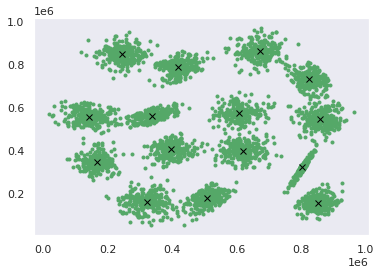

In [10]:
plt.figure()
plt.grid()
plt.plot(X.values[:,0],X.values[:,1],'.g')
for i in range(0,np.size(autocloud.c)):
    plt.plot(autocloud.c[i].mean[0],autocloud.c[i].mean[1],'x',color='black')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


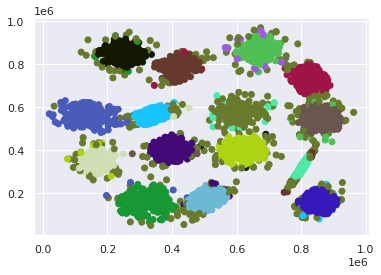

In [8]:
import seaborn as sns
plt.figure()
sns.set(style="darkgrid")
plt.scatter(X.values[:,0],X.values[:,1],color= np.asarray(list_cor[autocloud.classIndex]))
plt.show()

In [12]:
y_pred = autocloud.classIndex

print("Silhouette Coefficient: %10.4f" % (silhouette(X.values, y_pred)))
print("Adjusted Rand index: %10.4f" % (adjusted_rand(y, y_pred)))
print("Purity: %10.4f" % (purity(y, y_pred)))

# Consider the label of the clusters
print("Precision: %10.4f" % (precision(y, y_pred)))
print("Recall: %10.4f" % (recall(y, y_pred)))
print("F1-Score: %10.4f" % (f1(y, y_pred)))

Silhouette Coefficient:     0.5341
Adjusted Rand index:     0.8183
Purity:     0.9198
Precision:     0.1352
Recall:     0.1352
F1-Score:     0.1352


In [14]:
print(set(y_pred))
print(y.unique())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
[14 13  3  6  1  5  4 15  8  9  7 12  0 10 11]
